In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import statannot
import pymannkendall as mk
from scipy import stats
from scipy.stats import mannwhitneyu, normaltest,wilcoxon

sns.set(font="Arial")
plt.rcParams["font.family"] = "Arial"
sns.set_style("whitegrid")
plt.rcParams["mathtext.fontset"]='custom'

In [2]:
sams=pd.read_csv("sams_after_cutoff_04102024.csv")

## read prebiopsy drugs

In [3]:
preee=pd.read_csv('pre_biopsy_drug_timing.tsv',sep='\t')
preee=preee.drop_duplicates()
preee=preee[preee['ss_treatment_timing']=='Pre'].reset_index(drop=True)

In [4]:
sams['patientIdentifier']=sams['aa_barcode'].str[0:12]

In [5]:
def preatreat_num(row):
    pat=row['patientIdentifier']
    
    df=preee[preee['patientIdentifier']==row['patientIdentifier']]
    return len(df)

In [6]:
sams['NumberOfPretreatments_no_dup_new']=sams.apply(lambda row: preatreat_num(row),axis=1)

In [7]:
sams_hmf=sams[sams['study']=='HMF'].reset_index(drop=True)

In [8]:
def treat_num_bin(row):
    if(row['NumberOfPretreatments_no_dup_new']==0):
        if(row['any_pretreatment']=='Advanced\nUntreated'):
            return '0'
    elif(row['NumberOfPretreatments_no_dup_new']>=7):
        return '>=7'
    else:
        return str(str(row['NumberOfPretreatments_no_dup_new']))

In [9]:
sams_hmf['treat_num_bin']=sams_hmf.apply(lambda row: treat_num_bin(row),axis=1)

In [10]:
sams_hmf['treat_num_bin'].value_counts()

0      849
2      377
>=7    286
1      243
3      233
4      223
5      145
6      102
Name: treat_num_bin, dtype: int64

In [11]:
# test for ecDNA
hmf_all_ecDNA=sams_hmf[~sams_hmf['treat_num_bin'].isna()].sort_values('treat_num_bin').groupby('treat_num_bin').mean()[['ecDNA_count']].reset_index()\
['ecDNA_count'].tolist()
mk.original_test(hmf_all_ecDNA)

Mann_Kendall_Test(trend='increasing', h=True, p=0.018741136789596657, z=2.350640381700619, Tau=0.7142857142857143, s=20.0, var_s=65.33333333333333, slope=0.05260516888534765, intercept=0.31361686495266927)

In [12]:
# test for Non-ecDNA (ChrAmp)
hmf_all_ChrAmp=sams_hmf[~sams_hmf['treat_num_bin'].isna()].sort_values('treat_num_bin').groupby('treat_num_bin').mean()[['Non-ecDNA_count']].reset_index()\
['Non-ecDNA_count'].tolist()
mk.original_test(hmf_all_ChrAmp)

Mann_Kendall_Test(trend='increasing', h=True, p=0.035447892552460836, z=2.1032045520479223, Tau=0.6428571428571429, s=18.0, var_s=65.33333333333333, slope=0.12451273226588574, intercept=1.1741107785163234)

Text(7.14, 1.95, '*')

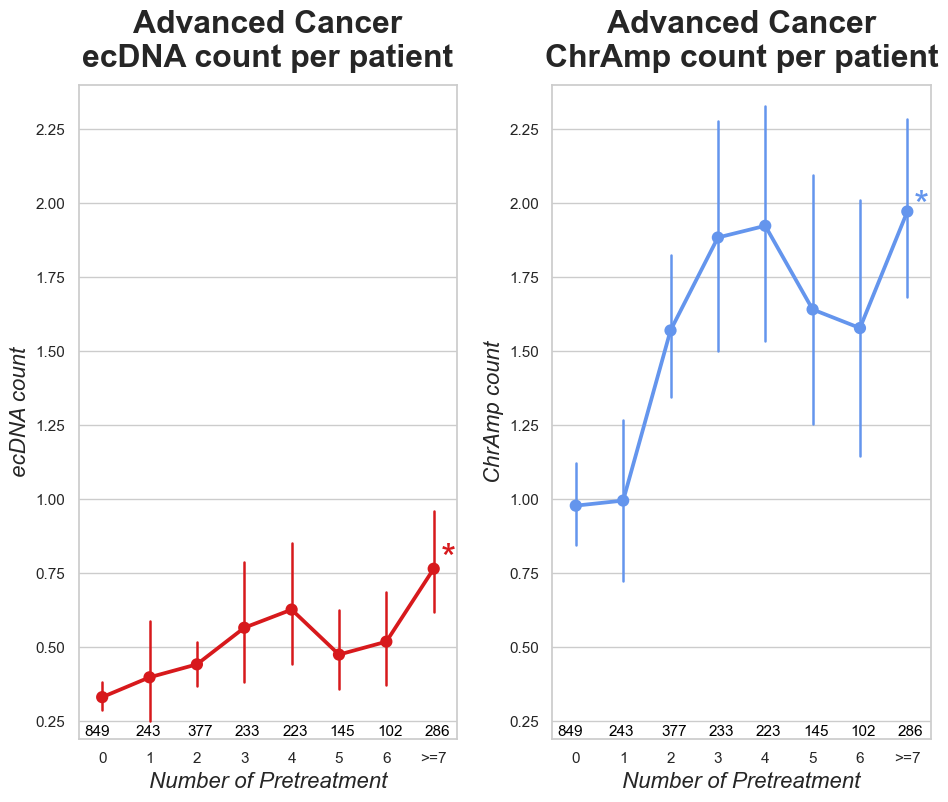

<Figure size 500x850 with 0 Axes>

<Figure size 500x850 with 0 Axes>

In [13]:
fig = plt.figure(figsize=(11,8.5))

gs = fig.add_gridspec(1, 2, width_ratios=[1,1])
gs.update(wspace=0.25)

ax2 = plt.subplot(gs[0, 1])
ax2.set(ylim=(0.19, 2.4))
ax1 = plt.subplot(gs[0, 0], sharey=ax2)

# FIRST
plt.figure(figsize=(5,8.5))
sns.set(font="Arial",font_scale=1.4,style="whitegrid")
plt.rcParams["font.style"] = "italic"
sns.pointplot(ax=ax1,data=sams_hmf[~sams_hmf['treat_num_bin'].isna()].sort_values('treat_num_bin')\
             ,x='treat_num_bin',y='ecDNA_count',errwidth=1.8,color='#D7191C')

ax1.set_xlabel('Number of Pretreatment',fontweight='normal',fontstyle='italic',fontsize=16)
ax1.set_ylabel('ecDNA count',fontweight='normal',fontstyle='italic',fontsize=16)
ax1.set_title("Advanced Cancer\necDNA count per patient",fontweight='bold',fontstyle='normal',fontsize=23,y=1.015)

ax1.text(-0.38,0.2,'849', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax1.text(0.7,0.2,'243', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax1.text(1.8,0.2,'377', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax1.text(2.8,0.2,'233', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax1.text(3.8,0.2,'223', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax1.text(4.8,0.2,'145', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax1.text(5.8,0.2,'102', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax1.text(6.8,0.2,'286', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax1.text(7.14,0.76,'*', fontsize = 28,fontweight='normal',fontstyle='normal',color='#D7191C')


#SECOND 
plt.figure(figsize=(5,8.5))
sns.set(font="Arial",font_scale=1.4,style="whitegrid")
plt.rcParams["font.style"] = "italic"
sns.pointplot(ax=ax2,data=sams_hmf[~sams_hmf['treat_num_bin'].isna()].sort_values('treat_num_bin')\
             ,x='treat_num_bin',y='Non-ecDNA_count',errwidth=1.8,color='#6495ED')

ax2.set_xlabel('Number of Pretreatment',fontweight='normal',fontstyle='italic',fontsize=16)
ax2.set_ylabel('ChrAmp count',fontweight='normal',fontstyle='italic',fontsize=16)
ax2.set_title("Advanced Cancer\nChrAmp count per patient",fontweight='bold',fontstyle='normal',fontsize=23,y=1.015)

ax2.text(-0.38,0.2,'849', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax2.text(0.7,0.2,'243', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax2.text(1.8,0.2,'377', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax2.text(2.8,0.2,'233', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax2.text(3.8,0.2,'223', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax2.text(4.8,0.2,'145', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax2.text(5.8,0.2,'102', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax2.text(6.8,0.2,'286', fontsize = 11,fontweight='normal',fontstyle='normal',color='black')
ax2.text(7.14,1.95,'*', fontsize = 28,fontweight='normal',fontstyle='normal',color='#6495ED')

#fig.savefig("/images/pngs/Fig2C.png", format="png", bbox_inches="tight",dpi=1200)
#fig.savefig("/images/pdfs/Fig2C.pdf", format="pdf", bbox_inches="tight",dpi=1200)
